# Week 2: Preprocessing Text (Part 1)


## Overview
A raw text document is just a sequence of characters. There are a number of basic steps that are often performed when processing natural language text. In lab sessions this week we will cover some of the basic text pre-processing methods. In particular, you will be looking at:
- <b> sentence segmentation</b> - roughly speaking, this involves grouping characters into sentences;
- <b> tokenisation</b> - roughly speaking, this involves grouping characters into words;
- <b>case normalisation</b> - this involves converting all of the text into lower case;
- <b>stemming</b> - this involves removing a word's inflections to find the stem; and
- <b>punctuation and stop-word removal</b> - stop-words are common functions words that in some situations can be ignored.

Note that we do not always apply all of the above preprocessing methods; it depends on the application. One of the things that you will be learning about in this module, is when the application of each of these methods is, and is not, appropriate.

We are going to be writing some of our own code, in order to develop understanding of methods and python programming, as well as experimenting with **off-the-shelf** technology.  In particular, we are going to be using the Python library **NLTK** (Natural Language ToolKit) to carry out some of these pre-processing methods.  

First, we need to import some libraries for use later on.  Its conventional to have all of your library imports in the first code cell of a notebook - but we can import more later on if necessary.

In [ ]:
import sys
import re
import pandas as pd
from itertools import zip_longest

#uncomment the following line on colab
#from google.colab import drive

## The NLTK sentence segmenter
The NLTK implements a sentence segmenter (called the Punkt segmenter).  It is generally simple to use.

**Function**: `sent_tokenize`

- Arguments
 - a single string, representing a document (or collection of documents)
- Returns
 - a list of strings, where each string is a sentence within the document



In [ ]:
#load the sent_tokenize function from the nltk.tokenize library
from nltk.tokenize import sent_tokenize

#some text to segment stored in testtext
testtext="I went to Portsmouth last week.  Don't you remember?  I saw H.M.S. Victory in Portsmouth.  I want to go to the U.S.A. next Summer."
#call the function sent_tokenize on the value of testtext
sent_tokenize(testtext)

The first time you run this, you will probably get an error because certain NLTK resources ('punkt') are not available.

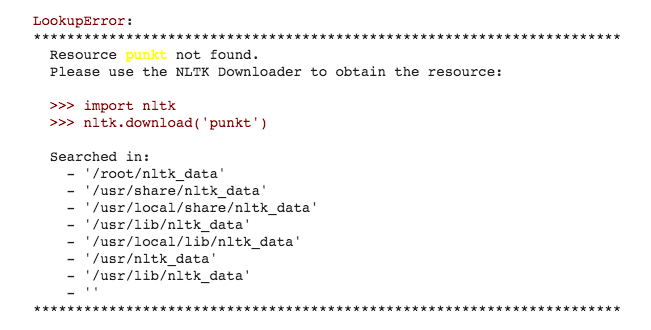

To fix this, you need to run the following cell.

In [ ]:
import nltk
nltk.download('punkt')

Now the sentence segmenter should work.

In [ ]:
#load the sent_tokenize function from the nltk.tokenize library
from nltk.tokenize import sent_tokenize

#some text to segment stored in testtext
testtext="I went to Portsmouth last week.  Don't you remember?  I saw H.M.S. Victory in Portsmouth.  I want to go to the U.S.A. next Summer."
#call the sent_tokenize function on the value of testtext
sent_tokenize(testtext)

### Exercise 1
Load in some text from a file (see Lab_1_2) and run the sentence segmenter on it.

Look at the output.  Can you see any mistakes?  Estimate the error rate (the number of errors divided by the number of actual sentences).

No mistakes for this piece of sample text so the error rate is 0.

In the earlier Portsmouth example, there was one error due to the H.M.S. abbreviation.  Therefore the error rate was 1/4 or 25%

## Word Tokenization

In some situations, just using Python's split function can perform adequate word tokenization.
**String method**: `split`

- Arguments
 - a string object which the method is called on, representing a sentence (or collection of sentences)
 - optionally, an extra argument which is the character to split by.  The default value for this argument is any whitespace
- Returns
 - a list of strings, where each string represents a token in the input string



In [ ]:
test_sentence="The cat  sat\ton the mat."
test_sentence.split()

Notice in the example above that two spaces and the tab character ('\t') were treated the same as a single space.

However, split() isn't able to separate punctuation from the end of a word.  In the following example, 'times,' and 'times.' are seen as instances of different word types because they are followed by different items of punctuation.

In [ ]:
opening_line="It was the best of times, it was the worst of times."
tokens=opening_line.split()
vocab=set(tokens)
print(vocab)

## The NLTK regular expression tokeniser
The NLTK implements a regular expression tokeniser `word_tokenize` that is based on the tokenisation guidelines found at ftp://ftp.cis.upenn.edu/pub/treebank/public_html/tokenization.html

The main ones are summarized below:
### Guidelines

- punctuation is split from adjoining words
- opening double quotes are changed to two single forward quotes.
- closing double quotes are changed to two single backward quotes.
- the Anglo-Saxon genitive of nouns are split into their component parts.
  - e.g. `"children's"` produces `"children 's"`
  - e.g. `"parents'"` produces `"parents '"`
- contractions should be split into component parts
  - e.g. `"won't"` produces `"wo n't"`
  - e.g. `"gonna"` produces `"gon na"`
  - e.g. `"I'm"` produces `"I 'm"`
  


**Function**: `word_tokenize`

- Arguments
 - a single string, representing a sentence
- Returns
 - a list of strings, where each string is a token within the sentence

### Exercise 2

- Make sure you understand the code in the cell below and then run it so that you can compare the way that the test sentence has been tokenised.

In [ ]:
#import the word_tokenize function from nltk
from nltk.tokenize import word_tokenize

# run the nltk tokeniser on a test sentence
test_sentence="The cat sat on the mat."
word_tokenize(test_sentence)


Now lets try something harder and compare the results of using the nltk tokeniser and the split function.

In [ ]:
testsentence = "After saying \"I won't help, I'm gonna leave!\", on his parents' arrival, the boy's behaviour improved."

# run the nltk tokeniser and your tokeniser on the test sentence
nltk_toks = word_tokenize(testsentence) # run the nltk tokeniser
split_toks = testsentence.split() # run split

pd.DataFrame(list(zip_longest(nltk_toks,split_toks)),columns=["NLTK", "SPLIT"])

What do you think the effect on the size of the vocabulary will be using the NLTK tokenizer rather than the split function?  Explain your answer.

#### My answer




### Available corpora
Next, we need some text to process.  Natural language engineering applications typically deal with large collections of documents which are referred to as **corpora**.

A number of corpora have been made readily available (and pre-processed to some extent) via NLTK.  You may need to download them via the nltk.download() function when you first want to use them.

- Gutenberg books (25k books `from nltk.corpus import gutenberg`)
- Reuters articles (~11k news articles `from nltk.corpus import reuters`)
- Twitter posts (20k tweets `from nltk.corpus import twitter_samples`)
- Brown corpus (the first 1 million word corpus made by Brown University in 1961, `from nltk.corpus import brown`)
- Plus many others: http://www.nltk.org/nltk_data/

### Getting sentences from a corpus
Let's start to look at some of these corpora.

The code in the next cell shows you how to import the reuters corpus and use its `.sents()` function which will return all of the sentences in the corpus.  There are over 50,000 sentences in the corpus so we don't want to print them all out.    Here we are just going to iterate over the first 10 sentences and print out the length of each sentence.


In [ ]:
from nltk.corpus import reuters

sents = reuters.sents()
sample_size = 10

for s in sents[1:10]:
    print(len(s))


What actually is the type of `sents` i.e, what does `reuters.sents()` return?  Well, lets check use the `type` function  

In [ ]:
type(sents)

Its something called a `ConcatenatedCorpusView` which is defined in the util package of nltk.corpus.reader.  You can check out the documentation online: https://www.nltk.org/_modules/nltk/corpus/reader/util.html

However, most of the time, you can think of it as a list of lists.  Each sentence is stored as a list of tokens and the whole corpus is stored as a list of sentences (i.e., a list of list of tokens).  To quote the nltk documentation:

    ``A 'view' of a corpus file acts like a sequence of tokens:
    it can be accessed by index, iterated over, etc.  However, the
    tokens are only constructed as-needed -- the entire corpus is
    never stored in memory at once.''
    
Let's just have a look at the first 10 sentences to be completely convinced that this is just like a list of lists.

In [ ]:
sents[0:10]

When we found the length of each sentence earlier, what is that length in terms of: the number of characters or the number of tokens?

#### My answer


## Random Sampling of Sentences

We don't always want to use the same 10 sentences from a corpus.  We want to be able to take random samples.  The function below will take a ConcatenatedCorpusView object such as is returned by `reuters.sents()` and returns a random sampe of size `sample_size`.  Study the code and make sure you understand how it works.

In [ ]:
import random

def sample_sentences(corpus,sample_size):

    size=len(corpus)
    ids=random.sample(range(size),sample_size) #what does this line do?
    sample=[corpus[i] for i in ids]  #this is an example of a list comprehension - what does it do?
    return sample



In [ ]:
random.seed(33) #uncomment this line if you want the same random sample every time you run the cell

sample=sample_sentences(sents,10)
print(sample)

### Exercise 3.1

- In the cell below, write code which will print a sample of **20** sentences from the **twitter_samples** corpus.  

Check out the documentation for the twitter_samples corpus reader here: http://www.nltk.org/howto/twitter.html#corpus_reader

Note that it has a `strings()` function rather than a `sents()` function to get back the text of tweets.


### Exercise 3.2

The twitter text doesn't come pre-tokenised.  Write some code to generate a list of list of tokens for your sample.

### Exercise 3.3

- In the cell below write code that will take a sample of sentences from each of the Reuters, Twitter and Gutenberg corpora and displays the average length (as measured in terms of the number of tokens in the sentence).

- How large do you think the sample size should be in order to decide whether the differences observed are systematic or random?

#### MY ANSWER
